# **Sales forecasting system**

**1.1. DEFINITION PROBLEM**

- We want to set up our company's warehouse in another location and we need to estimate the rate of sales, which has been increasing since the company's creation, for the next few months in order to provide the space we will need.

**1.2. LIBRARY IMPORTING**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

**1.3. DATA COLLECTION**

In [7]:
# pd.options.display.max_columns=None
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [9]:
# Paso 2.1: Convertir datos al formato de serie temporal
df['date'] = pd.to_datetime(df['date'])  # Convertimos la columna 'date' a formato datetime
df.set_index('date', inplace=True)  # Establecemos 'date' como índice
df = df.sort_index()  # Aseguramos que esté ordenado por fecha
df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


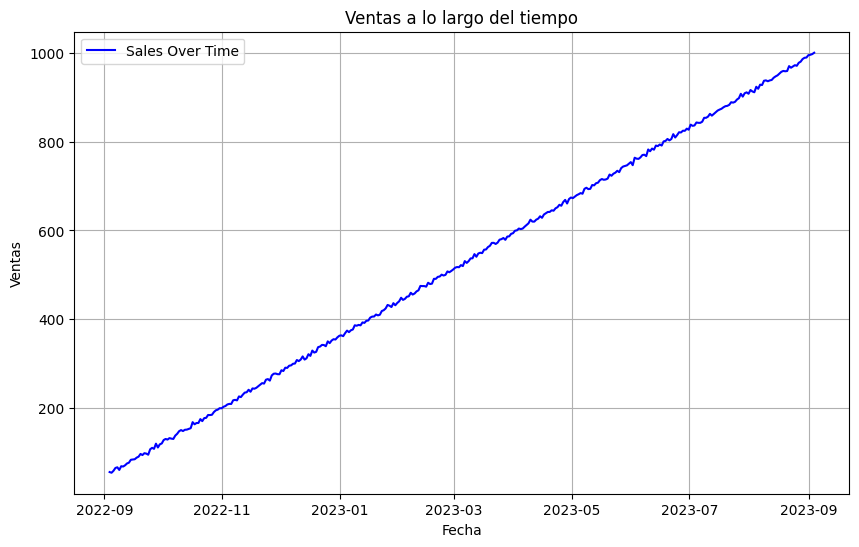

In [10]:
# Paso 2.2: Graficar la serie temporal
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sales'], label='Sales Over Time', color='blue')
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid()
plt.show()

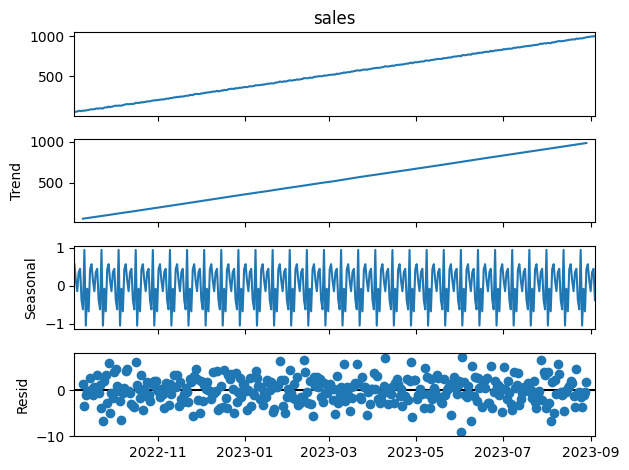

In [11]:
decomposition = seasonal_decompose(df['sales'], model='additive', period=12)  # Suponiendo periodicidad mensual
decomposition.plot()
plt.show()